In [1]:
import os
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import display

### Reference tutorial:
https://www.analyticsvidhya.com/blog/2021/06/text-detection-from-images-using-easyocr-hands-on-guide/

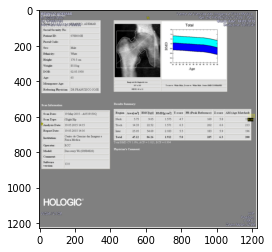

In [2]:
IMAGE_PATH = r'C:\Users\Leo\Documents\TextExtr\image832.png'

plt.imshow(plt.imread(IMAGE_PATH))

In [3]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH,paragraph="False")
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[[[[6, 8], [324, 8], [324, 121], [6, 121]],
  'BRANCO ADEMAR M 02/05//1950 ID; 0783@18H Aca A2oij6i 1217090360 , ADEMAR Social Secwity No:'],
 [[[772, 7], [1220, 7], [1220, 98], [772, 98]],
  'Centro de Ciencias das Fisica Mledica__ Ref: DR (inageisegi JOSE I Perf: Siud date: 19/05/2015 Total Siudy time: 09.25.47'],
 [[[605, 33], [623, 33], [623, 55], [605, 55]], 'H'],
 [[[23, 137], [101, 137], [101, 155], [23, 155]], 'Patient ID:'],
 [[[175, 135], [251, 135], [251, 155], [175, 155]], '0783016H'],
 [[[23, 171], [109, 171], [109, 187], [23, 187]], 'Posral Code'],
 [[[23, 205], [57, 205], [57, 221], [23, 221]], 'Ser'],
 [[[177, 205], [213, 205], [213, 221], [177, 221]], 'Male'],
 [[[707, 179], [725, 179], [725, 229], [707, 229]], '8'],
 [[[22, 238], [91, 238], [91, 257], [22, 257]], 'Etluucity:'],
 [[[179, 239], [217, 239], [217, 255], [179, 255]], 'White'],
 [[[23, 273], [77, 273], [77, 289], [23, 289]], 'Height:'],
 [[[177, 269], [241, 269], [241, 289], [177, 289]], '170.5 cm'],
 [[[22

In [4]:
result[3]

[[[23, 137], [101, 137], [101, 155], [23, 155]], 'Patient ID:']

In [5]:
img = plt.imread(IMAGE_PATH)

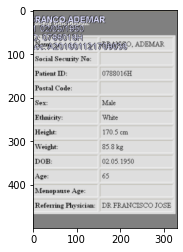

In [6]:
img2 = img[0:500,20:350].copy()
plt.imsave("cut.png", img2)
plt.imshow(img2)

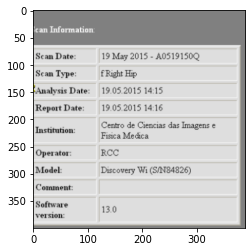

In [7]:
img3 = img[500:900,20:410].copy()
plt.imsave("cut3.png", img3)
plt.imshow(img3)

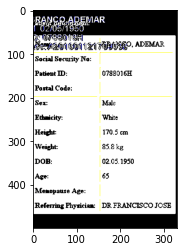

In [8]:
retval, dst = cv2.threshold(img2, .7, 1, cv2.THRESH_BINARY)
plt.imshow(dst)
plt.imsave("cut2_binary.png", dst)

In [9]:
image_path_2 = r'C:\Users\Leo\Documents\TextExtr\cut.png'

In [10]:
reader2 = easyocr.Reader(['en'])
result2 = reader2.readtext(image_path_2, paragraph="true", detail=0)
result2

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['RANCO ADEMAR 02/05/1950 D; 073,16H 1 A2ij60i/ 121709/0360, ADEMAR Social Secwiry No:',
 'Patient ID:',
 '0788016H',
 'Posral Code',
 'Ser',
 'Male',
 'Ethcity:',
 'White',
 'Height:',
 '170.5 cm',
 'Weight:',
 '85.8kg 02.05.1950',
 'DOB:',
 'Age:',
 'Menopause Age=',
 'Refening Physician: DR FRANCISCO JOSE']

### Preprocessing image for OCR imrpovements

In [11]:
image = cv2.imread(image_path_2)
kernel = np.array([[-1,-1,-1], 
                  [-1, 9,-1],
                  [-1,-1,-1]])
sharpened = cv2.filter2D(image, -1, kernel) # applying the sharpening kernel to the input image & displaying it.
cv2.imshow('Image Sharpening', sharpened)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.imwrite("sharp.png", sharpened)

In [ ]:
image_path_3 = r'C:\Users\Leo\Documents\TextExtr\sharp.png'
reader3 = easyocr.Reader(['en'])
result3 = reader3.readtext(image_path_3, paragraph="true", detail=0, min_size=5, add_margin=0.1)
result3

In [ ]:
image_path_3 = r'C:\Users\Leo\Documents\TextExtr\cut2_binary.png'
reader3 = easyocr.Reader(['en'])
result3 = reader3.readtext(image_path_3, paragraph="true", detail=0)
result3